# Car Price Prediction

## Importing Libraries & Loading Data

In [1]:
import numpy as np #Linear Algebra
import pandas as pd#Data Preprocessing
import matplotlib.pyplot as plt#Data Visualizations
import seaborn as sns

#for modelling
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer

%matplotlib inline

In [2]:
#Loading the data

car = pd.read_csv("quikr_car.csv")
car.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000 kms",Diesel


In [3]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        892 non-null    object
 1   company     892 non-null    object
 2   year        892 non-null    object
 3   Price       892 non-null    object
 4   kms_driven  840 non-null    object
 5   fuel_type   837 non-null    object
dtypes: object(6)
memory usage: 41.9+ KB


In [4]:
backup=car.copy()

#### We can see that there year, price, columns are object we need to change it to int format.Also, there are NaN values in year, Price, kms_driven, fuel_type , will remove it.

## Data Preprocessing

In [5]:
# For year column

car = car[car['year'].str.isnumeric()]
car['year']=car['year'].astype(int)

In [6]:
# For kms_driven column

car['kms_driven']=car['kms_driven'].str.split().str.get(0)
car['kms_driven']=car['kms_driven'].str.replace(',','')
car=car[car['kms_driven']!= 'Petrol']
car=car[~car['kms_driven'].isnull()]
car['kms_driven']=car['kms_driven'].astype(int)

In [7]:
# For price column

car=car[car['Price']!='Ask For Price']
car['Price']=car['Price'].str.replace(',','').astype(int)

In [8]:
car.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 817 entries, 0 to 889
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        817 non-null    object
 1   company     817 non-null    object
 2   year        817 non-null    int64 
 3   Price       817 non-null    int64 
 4   kms_driven  817 non-null    int64 
 5   fuel_type   816 non-null    object
dtypes: int64(3), object(3)
memory usage: 44.7+ KB


In [9]:
# For fuel_type column
car=car[~car['fuel_type'].isnull()]

In [10]:
# After dropping rows, index is shifted hence resetting it.
car.reset_index(drop=True)

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,425000,40,Diesel
2,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,325000,28000,Petrol
3,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,575000,36000,Diesel
4,Ford Figo,Ford,2012,175000,41000,Diesel
...,...,...,...,...,...,...
811,Maruti Suzuki Ritz VXI ABS,Maruti,2011,270000,50000,Petrol
812,Tata Indica V2 DLE BS III,Tata,2009,110000,30000,Diesel
813,Toyota Corolla Altis,Toyota,2009,300000,132000,Petrol
814,Tata Zest XM Diesel,Tata,2018,260000,27000,Diesel


#### for better modelling we will fetch only 3 words from column 'name'

In [11]:
# For name column
car['name']=car['name'].str.split( ).str.slice(0,3).str.join(' ')
car.reset_index(drop=True)

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,425000,40,Diesel
2,Hyundai Grand i10,Hyundai,2014,325000,28000,Petrol
3,Ford EcoSport Titanium,Ford,2014,575000,36000,Diesel
4,Ford Figo,Ford,2012,175000,41000,Diesel
...,...,...,...,...,...,...
811,Maruti Suzuki Ritz,Maruti,2011,270000,50000,Petrol
812,Tata Indica V2,Tata,2009,110000,30000,Diesel
813,Toyota Corolla Altis,Toyota,2009,300000,132000,Petrol
814,Tata Zest XM,Tata,2018,260000,27000,Diesel


In [12]:
car.describe()

,year,Price,kms_driven
count,816.000000,8.160000e+02,816.000000
mean,2012.444853,4.117176e+05,46275.531863
std,4.002992,4.751844e+05,34297.428044
min,1995.000000,3.000000e+04,0.000000
25%,2010.000000,1.750000e+05,27000.000000
50%,2013.000000,2.999990e+05,41000.000000
75%,2015.000000,4.912500e+05,56818.500000
max,2019.000000,8.500003e+06,400000.000000


#### if we observe this result, we can see the maximum values are way far from the rest of the data points so these are outliers, needs to be removed.

## Data Visualization

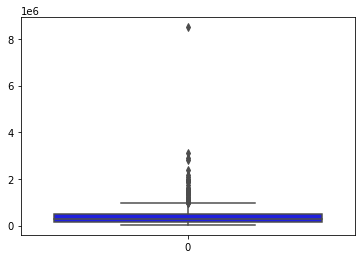

In [13]:
sns.boxplot(data=car['Price'], color='blue');

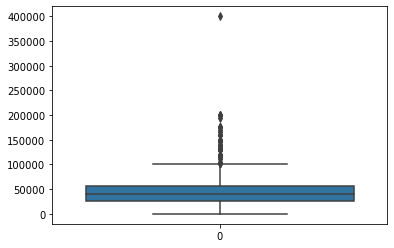

In [14]:
sns.boxplot(data=car['kms_driven']);

In [15]:
car=car[car['Price']<8500000]
car=car[car['kms_driven']<350000]

In [16]:
car.reset_index(drop=True)

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,425000,40,Diesel
2,Hyundai Grand i10,Hyundai,2014,325000,28000,Petrol
3,Ford EcoSport Titanium,Ford,2014,575000,36000,Diesel
4,Ford Figo,Ford,2012,175000,41000,Diesel
...,...,...,...,...,...,...
809,Maruti Suzuki Ritz,Maruti,2011,270000,50000,Petrol
810,Tata Indica V2,Tata,2009,110000,30000,Diesel
811,Toyota Corolla Altis,Toyota,2009,300000,132000,Petrol
812,Tata Zest XM,Tata,2018,260000,27000,Diesel


In [17]:
car.to_csv('Clean Dataset.csv')

## Model Creation and evaluation

#### As we are going to apply the linear regression as the dependent variable is continues in nature of regression.

In [18]:
# Training and splitting the data

X=car.drop(columns='Price')
y=car['Price']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [19]:
from sklearn.preprocessing import OneHotEncoder

ohe=OneHotEncoder()
ohe.fit(X[['company','name','fuel_type']])

OneHotEncoder()

In [20]:

# applying transformations to the categorical columns with OHE.
column_trans=make_column_transformer((OneHotEncoder(categories=ohe.categories_),
                                     ['company','name','fuel_type']),remainder="passthrough")

# Making a object of the algorithm
lr=LinearRegression()

# We do not have to put transformations everytimes as it is already done with OHE
pipe=make_pipeline(column_trans,lr)

In [21]:
#Training the data

pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['Audi', 'BMW', 'Chevrolet', 'Datsun', 'Fiat', 'Force', 'Ford',
       'Hindustan', 'Honda', 'Hyundai', 'Jaguar', 'Jeep', 'Land',
       'Mahindra', 'Maruti', 'Mercedes', 'Mini', 'Mitsubishi', 'Nissan',
       'Renault', 'Skoda', 'Tata', 'Toyota', 'Vol...
       'Volkswagen Passat Diesel', 'Volkswagen Polo',
       'Volkswagen Polo Comfortline', 'Volkswagen Polo Highline',
       'Volkswagen Polo Highline1.2L', 'Volkswagen Polo Trendline',
       'Volkswagen Vento Comfortline', 'Volkswagen Vento Highline',
       'Volkswagen Vento Konekt', 'Volvo S80 Summum'], dtype=object),
                                                                            array(['Diesel', 'LPG', 'Petrol'], dtype=object)]),
                                           

In [22]:
#Predicting the values by putting 20% test dataset
y_pred= pipe.predict(X_test)

In [23]:
# Evaluating the model by using R2 score
r2_score(y_test,y_pred)

0.6475501184471886

#### It is been observed at every random state we get different R2 score so we will be getting that R2 score which is maximum.

In [24]:
scores=[]

for i in range(1000):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=i)
    lr=LinearRegression()
    pipe=make_pipeline(column_trans,lr)
    pipe.fit(X_train,y_train)
    y_pred= pipe.predict(X_test)
    scores.append(r2_score(y_test,y_pred))

In [25]:
np.argmax(scores)

124

In [26]:
scores[np.argmax(scores)]

0.9040587603784292

In [27]:
#Final process for getting best R2 score amongst them. 

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=np.argmax(scores))
lr=LinearRegression()
pipe=make_pipeline(column_trans,lr)
pipe.fit(X_train,y_train)
y_pred= pipe.predict(X_test)
r2_score(y_test,y_pred)

0.9040587603784292

In [28]:
#Saving the model in pickle file

import pickle
pickle.dump(pipe,open('LinearRegressionModel.pkl','wb'))

In [29]:
a=pipe.predict(pd.DataFrame([['Tata Zest XM','Tata','2018','1000','Petrol']],columns=['name','company','year','kms_driven','fuel_type']))
b=round(a[0],2)
c = "Price of the car is : {currency}{amount}".format(currency = "₹", amount = b)
c

'Price of the car is : ₹226731.33'